In [1]:
import nltk
import re
import sklearn
import numpy as np

In [8]:
question = open('question_1.txt','r').readlines()
answer = open('answer_1.txt','r').readlines()

In [9]:
len(question),len(answer)

(692746, 692746)

In [12]:
len(question + answer)

1385492

### Buat text_to_sequence encoding

In [159]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(question+answer)

que_train = tokenizer.texts_to_sequences(question)
ans_train = tokenizer.texts_to_sequences(answer)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [160]:
len(que_train),len(ans_train)

(692746, 692746)

In [161]:
tkn = tokenizer.word_index

In [162]:
def seq_to_text(dictword,seqs):
    "Konversi list kalimat di match dengan index yg ada di dictword."
    result=[]
    for i in seqs:
        try:
            result.append(list(dictword.keys())[list(dictword.values()).index(i)])
        except:
            result.append("")
    return result

In [163]:
def transposer(plist,multiplier,mult=True):
    """Mengalikan list angka, menjadi sebuah 
    float dengan perbandingan tertentu. \
    Apabila mult = true maka akan dikalikan \
    apabila tidak, maka akan dibagi."""
    for idx,i in enumerate(plist):
        for idy, h in enumerate(i):
            if mult:
                i[idy] = int(h * multiplier)
            else:
                try:
                    i[idy] = h / multiplier
                except:
                    print('some error - when dividing')
    return plist

### Jadikan list sebuah rangkaian Float sequence

In [164]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 25

que_train = pad_sequences(que_train, padding='post', maxlen=maxlen)
ans_train = pad_sequences(ans_train, padding='post', maxlen=maxlen)

In [71]:
magicnum = 32768
que_train = que_train / magicnum
ans_train = ans_train / magicnum

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(que_train, ans_train, test_size=0.2)

In [192]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
y_train = y_train.reshape(y_train.shape[0],y_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_test = y_test.reshape(y_test.shape[0],y_test.shape[1],1)

In [193]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [194]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.recurrent import LSTM,SimpleRNN
from keras import optimizers

model=Sequential()
model.add(LSTM(input_shape=(30,1), return_sequences=True, units=1,activation="sigmoid", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal"))
model.add(LSTM(input_shape=(30, 1), return_sequences=True, units=1, activation="sigmoid", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal"))
#model.add(LSTM(input_shape=(25, 1), return_sequences=True, activation="sigmoid", units=300, kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal"))
#model.add(LSTM(input_shape=(25, 1), return_sequences=True, activation="sigmoid", units=300, kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal"))
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='cosine_proximity', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 30, 1)             12        
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 1)             12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


Train on 554196 samples, validate on 138550 samples
Epoch 1/10
554196/554196 [==============================] - 265s 479us/step - loss: -0.1137 - acc: 0.8863 - val_loss: -0.1137 - val_acc: 0.8863
Epoch 2/10
554196/554196 [==============================] - 264s 477us/step - loss: -0.1137 - acc: 0.8863 - val_loss: -0.1137 - val_acc: 0.8863
Epoch 3/10
554196/554196 [==============================] - 265s 479us/step - loss: -0.1137 - acc: 0.8863 - val_loss: -0.1137 - val_acc: 0.8863
Epoch 4/10
554196/554196 [==============================] - 271s 488us/step - loss: -0.1137 - acc: 0.8863 - val_loss: -0.1137 - val_acc: 0.8863
Epoch 5/10
554196/554196 [==============================] - 272s 491us/step - loss: -0.1137 - acc: 0.8863 - val_loss: -0.1137 - val_acc: 0.8863
Epoch 6/10
554196/554196 [==============================] - 276s 498us/step - loss: -0.1137 - acc: 0.8863 - val_loss: -0.1137 - val_acc: 0.8863
Epoch 7/10
554196/554196 [==============================] - 279s 503us/step - loss: 

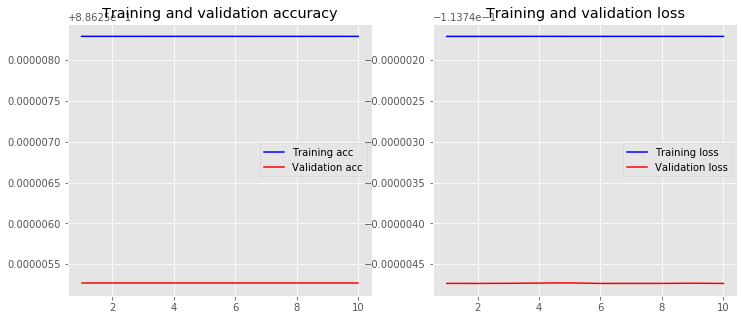

In [196]:
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))
#model.save('LSTM500.h5');
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)